#Idea: Predicting House Prices with Linear Regression


---

**The objective of this project is to build a predictive model using linear regression to estimate a
numerical outcome based on a dataset with relevant features. Linear regression is a
fundamental machine learning algorithm, and this project provides hands-on experience in
developing, evaluating, and interpreting a predictive model.**


#Data Collection: Obtain a dataset with numerical features and a target variable for prediction.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#Data Exploration and Cleaning:


---



>  **Explore the dataset to understand its structure, handle missing values, and ensure data quality.**

In [ ]:
df.duplicated().any()

False

In [ ]:
print("Main Road : ",df.mainroad.unique())
print("Guest Room : ",df.guestroom.unique())
print("Basement : ",df.basement.unique())
print("Hot Water Heating : ",df.hotwaterheating.unique())
print("Air Coditioning : ",df.airconditioning.unique())
print("Prefer Area : ",df.prefarea.unique())

print("Furnishng Status : ",df.furnishingstatus.unique())


Main Road :  ['yes' 'no']
Guest Room :  ['no' 'yes']
Basement :  ['no' 'yes']
Hot Water Heating :  ['no' 'yes']
Air Coditioning :  ['yes' 'no']
Prefer Area :  ['yes' 'no']
Furnishng Status :  ['furnished' 'semi-furnished' 'unfurnished']


In [ ]:
# df.drop(columns = ['stories'],inplace = True)

In [ ]:
dummie_table = pd.get_dummies(df,columns = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'])

In [ ]:
dummie_table.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [ ]:
dummie_table = dummie_table.astype(int)
dummie_table

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,1,0,...,1,1,0,1,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
542,1750000,3620,2,1,1,0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
543,1750000,2910,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0


In [ ]:
dummie_table.drop(columns = ['furnishingstatus_unfurnished','mainroad_no','guestroom_no','basement_no','hotwaterheating_no','airconditioning_no','prefarea_no'],axis = 1,inplace = True)

In [ ]:
dummie_table

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,1,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,1,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,0,1
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,1,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0


#Feature Selection:


---




> **Identify relevant features that may contribute to the predictive model.**



In [ ]:
z_scores = (dummie_table - np.mean(dummie_table,axis = 0)) /np.std(dummie_table,axis  =0)
abs_z_score = np.abs(z_scores)
threshold = 3

outliers = (abs_z_score>threshold).any(axis = 1)
outliers_index = dummie_table.index[outliers]

cleaned_data = dummie_table[~outliers]
len(cleaned_data)

499

In [ ]:
cleaned_data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished
8,9870000,8100,4,1,2,2,1,1,1,0,1,1,1,0
9,9800000,5750,3,2,4,1,1,1,0,0,1,1,0,0
12,9310000,6550,4,2,2,1,1,0,0,0,1,1,0,1
14,9240000,7800,3,2,2,0,1,0,0,0,0,1,0,1
15,9100000,6000,4,1,2,2,1,0,1,0,0,0,0,1


In [ ]:
features = cleaned_data.drop(columns = ['price'])
target = cleaned_data['price']

In [ ]:
features.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished
8,8100,4,1,2,2,1,1,1,0,1,1,1,0
9,5750,3,2,4,1,1,1,0,0,1,1,0,0
12,6550,4,2,2,1,1,0,0,0,1,1,0,1
14,7800,3,2,2,0,1,0,0,0,0,1,0,1
15,6000,4,1,2,2,1,0,1,0,0,0,0,1


In [ ]:
target.head()

8     9870000
9     9800000
12    9310000
14    9240000
15    9100000
Name: price, dtype: int64

#Model Training:


---



>**Implement linear regression using a machine learning library (e.g., Scikit-
Learn).**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.1,random_state = 12)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler_train = scaler.fit_transform(x_train)
x_scaler_test = scaler.transform(x_test)

In [ ]:
model = linear_model.LinearRegression()
model.fit(x_scaler_train,y_train)


LinearRegression()

In [ ]:
model.coef_

array([444870.41922815,  52020.88848019, 366691.3619926 , 385135.34210848,
       167582.64624362, 130211.78993489, 152251.08251713,  87528.27048241,
            0.        , 383788.5008812 , 258739.05704801, 148839.07875189,
       215178.49126629])

In [ ]:
model.intercept_

4607612.338530066


#Model Evaluation:


---



> **Evaluate the model's performance on a separate test dataset using
metrics such as Mean Squared Error or R-squared.**

In [ ]:
y_pred = model.predict(x_scaler_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mse

827967449580.114

In [ ]:
r_square = r2_score(y_test,y_pred)
r_square

0.7523442847032121

In [ ]:
score = model.score(x_scaler_test,y_test)

In [ ]:
print(f"Model Score : {round(score*100,2)}%")

Model Score : 75.23%


#Visualization:


---



> **Create visualizations to illustrate the relationship between the predicted and
actual values.**

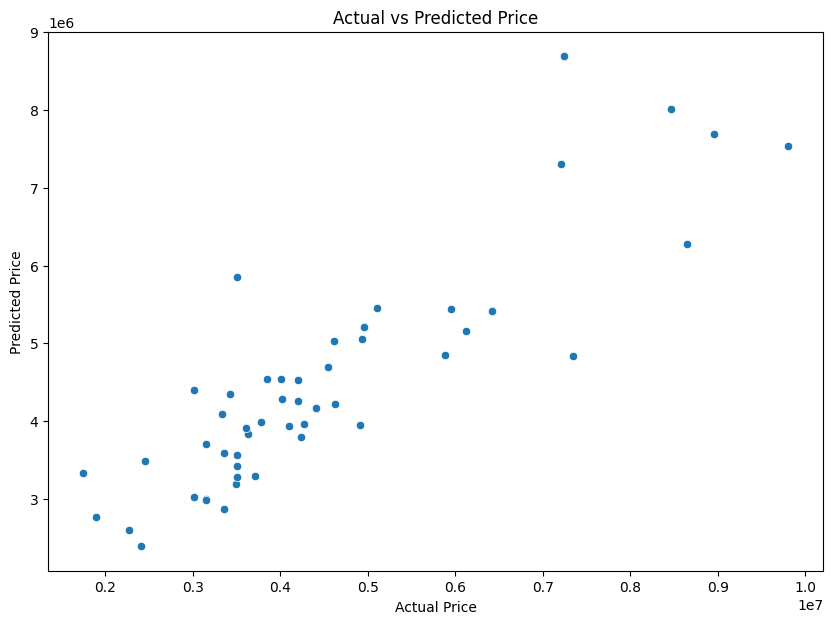

In [ ]:
plt.figure(figsize= (10,7))
sns.scatterplot(x = y_test,y = y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

<Axes: >

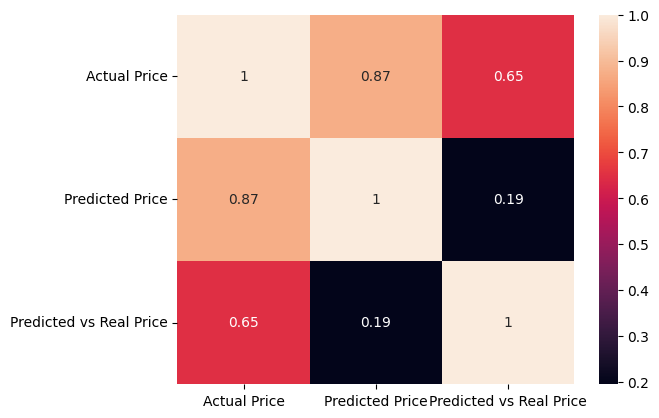

In [ ]:
pred_vs_real  = y_test - y_pred
result = pd.DataFrame({'Actual Price' : y_test,'Predicted Price':y_pred,'Predicted vs Actual Price':pred_vs_real})
correlation = result.corr()
sns.heatmap(correlation,annot = True)